In [52]:
# imports
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [53]:
# Load data
data = pd.read_csv('insurance.csv')
#check it out...
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [54]:
# Preprocessing
# One-hot Encoding with one hot encoder to categories
encoder = OneHotEncoder(drop = 'first', sparse_output =False)
categorical_features = encoder.fit_transform(data[['sex','smoker','region']])

In [55]:
categorical_features

array([[0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.]])

In [56]:
# Combine categorical and numerical features
numerical_features = data.select_dtypes('number').values #includs target
data.select_dtypes('number').keys() #see the names

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [57]:
num_features = data[['age', 'bmi', 'children']].values

In [58]:

features = np.concatenate([num_features, 
                           categorical_features], axis=1)

target = data['charges'].values

In [59]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [63]:
X_train[:,0:3]

array([[46.   , 19.95 ,  2.   ],
       [47.   , 24.32 ,  0.   ],
       [52.   , 24.86 ,  0.   ],
       ...,
       [58.   , 25.175,  0.   ],
       [37.   , 47.6  ,  2.   ],
       [55.   , 29.9  ,  0.   ]])

In [62]:
features[:,0:3]

array([[19.  , 27.9 ,  0.  ],
       [18.  , 33.77,  1.  ],
       [28.  , 33.  ,  3.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  0.  ]])

In [64]:
# Feature Scaling
scaler = StandardScaler()
X_train[:,0:3] = scaler.fit_transform(X_train[:,0:3])
X_test[:,0:3] = scaler.transform(X_test[:,0:3])
X_train.shape[1]

8

In [65]:
# Challenge
# Build model
model = tf.keras.Sequential([
    tf.keras.Input((X_train.shape[1],)), # 11/8 Inputs  
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation=None)
])

In [66]:
# Compile model
model.compile(
    loss = 'mse',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
    #for SGD need 0.001 and loss = 'mae'
    metrics=['mae'] # 
    #metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [67]:
# Train model
history = model.fit(
    X_train, y_train,epochs=10,
    batch_size=32, # מנות 
    validation_split=0.2 #בחינה עצמית תוך כדי אימון
)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 315062816.0000 - mae: 13229.2734 - val_loss: 300799680.0000 - val_mae: 12350.5635
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 291215072.0000 - mae: 12412.5068 - val_loss: 257717664.0000 - val_mae: 10886.3389
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 235901616.0000 - mae: 10721.2686 - val_loss: 183056832.0000 - val_mae: 8223.8916
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 159286624.0000 - mae: 8073.8579 - val_loss: 122758472.0000 - val_mae: 6822.9883
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 118805672.0000 - mae: 7654.0952 - val_loss: 101798824.0000 - val_mae: 7036.9922
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 108261952.0000 - mae: 7941.6494 - val_loss: 93761664.0000 - val_mae: 6942.7495
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 84943240.0000 - mae: 7121.3188 - val_loss: 86312672.0000 - val_mae: 6551.3721
Epoch 8/10
27/27 ━━━━━━━━

In [68]:
#make a prediction
predicted = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


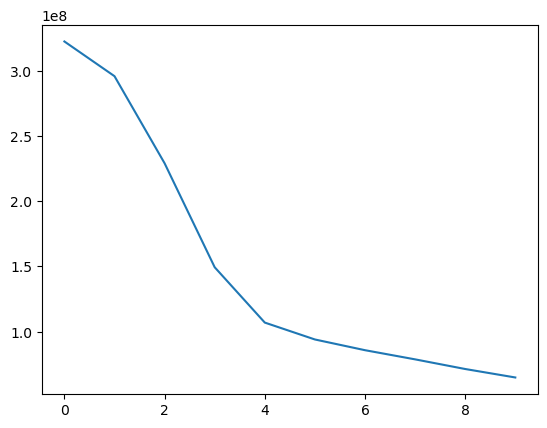

In [69]:
#Evaluation:

plt.plot(history.history['loss'], label = 'loss')
plt.show()

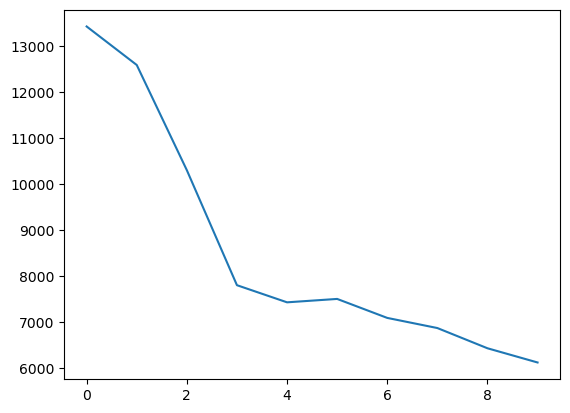

In [71]:
plt.plot(history.history['mae'],label = 'rmse')

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,005 (11.74 KB)

 Trainable params: 1,001 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,004 (7.83 KB)

In [73]:
# Model Evaluation
my_loss, my_metrics = model.evaluate(X_test, y_test)
print(f"MSE: {my_loss}")
print(f"MAE: {my_metrics}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58040276.0000 - mae: 5920.6440 
MSE: 62290732.0
MAE: 6037.36328125


In [75]:
# Model Prediction Visualization (MSE/MAE/VIZ)

#y_pred = model.predict(X_test).reshape(-1)

y_pred = model.predict(X_test).flatten()#same- more common

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


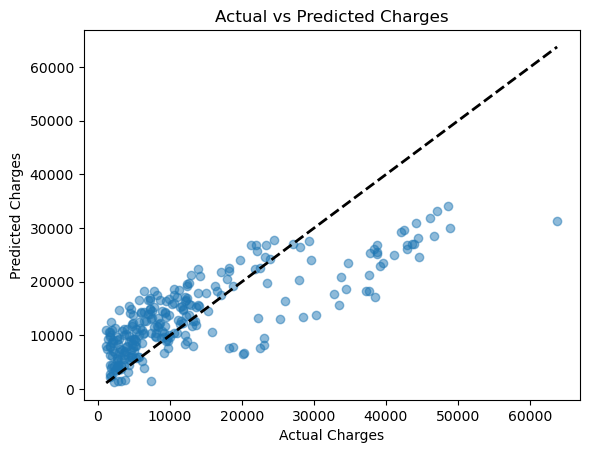

In [77]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.show()